<img src="Images/AWK_LOGO.jpg" width="200" align="right">

# Einführung

Willkommen zu unseren AWK Data-analytics Workshop. Unser Ziel ist es ihnen in den nächsten zwei Stunden einen Überblick zu geben über den Alltag eines Datenwissenschaftlers, der für eine hypothetische Stadt Neu-Bern mit Immobilien Daten arbeitet.

Ein Data Scientist oder auch Datenwissenschaftler genannt ist primär daran interessiert aus einer grossen Menge von Daten Wissen zu generieren und Erkenntnisse zu sammeln. Sein Ziel ist es Probleme zu identifizieren, Optimierungspotential zu entdecken und mögliche Lösungen vorzuschlagen. Diese Lösungen können strategische Entscheidungen sein genauso wie konkrete KI-algorithmen, die eine spezifischen Prozess optimieren oder möglich machen. So verschieden diese Arbeit auch sein kann, das Grundelement bleiben aber immer die Daten.

Sie werden in den nächsten 2 Stunden also hier interaktiv lernen können:

* Wie man ein Überblick über einen Datensatz bekommen kann.
* Wie man Trends in Immobilien Daten entdeckt.
* Wie man einen KI-Algorithmus baut, das die Verkaufspreise von Immobilien vorhersehen kann.
* Wie man ein solches KI-Algorithmus praktisch anwenden kann.

Das Grundelement für den Workshop wird das jetzige Jupyter Notebook sein, dass sie hier gerade lesen. Jupyter Notebooks sind in Zellen unterteilte, interaktive Coding und Visualisierung Umgebung, die oft von Datenwissenschaftler für die Präsentation von Resultaten benutzt wird. Wir haben hier die Hauptarbeit der verschiedenen Aufgaben für sie schon auf Python vorprogrammiert, damit sie sich auf das Verstehen, das Experimentieren und das Spass haben konzentrieren können.

Für die Workshops brauchen sie keine Python Erfahrung: Die meisten Zellen sind schon für sie vorprogrammiert und, um sie zu aktivieren, müssen sie bei jeder Zelle nur auf Play drücken (obere Menuleiste). Die Zellen, wo ihr Input gefragt ist, sind beschriftet.



Im Falle von Problemen, können sie sonst immer auf einen ihrer Moderator/innen zugehen. 




In [1]:
# Wir laden hier die benötigten Python Module
import pandas as pd
from sklearn.tree import DecisionTreeRegressor
from sklearn.model_selection import train_test_split
import matplotlib.pyplot as plt
import numpy as np
from IPython.display import display
import Bern_Immobilien_Lib as Plib
from bokeh.io import output_notebook, show
from bokeh.models import ColumnDataSource, Range1d
from bokeh.plotting import figure
import squarify    # pip install squarify (algorithm for treemap)

pd.options.display.width = 0
pd.set_option('display.width', 150)
versuchs_Nr = 0

Hier können sie ihre Gruppen Nummer eintragen, falls dies noch nicht gemacht ist:

In [2]:
# MODIFICATION MÖGLICH
group_id = 1

# Berner Immobilien Daten

<img src=attachment:81943432-66ec-4c1a-a0c3-a923549f6840.png width="500" align="right">

In diesen Abschnitt sind wir an den Immobilien Daten einer hypothetischen Stadt Neu Bern interessiert. Immobilien Preise sind nun seit Jahren ein Problem und weniger und weniger Leute sind in der Lage sich ein eigenes Haus oder Wohnung in der Stadt zu kaufen. Die Stadtverwaltung möchte das Problem in Griff bekommen und hat dazu ein Datensatz der Immobilien Preise beim Verkauf über 5 Jahre (2006-2010) angelegt. Über 5 Jahre haben Inspektoren von der Stadt 1500 Immobilienverkäufe in der Stadt geprüft und Preise aber auch 71 andere Kriterien über den Zustand der Immobilie notiert und zusammengetragen.


## 1) Daten laden und einen ersten Überblick bekommen

Das schwierigste für ein Datenwissenschaftlers ist die Datenqualität und die Vorbereitung des Datensatzes. Oft sind Daten sehr heterogen, haben falsche oder fehlende Datenpunkte und dies zu beheben ist oft ein langwieriger Prozess bevor jeder neuen Aufgabe. Hier haben wir die Daten schon runtergeladen und die Datenqualität für sie schon teilweise verifiziert. Um sie in das Jupyter Notebook zu bekommen, müssen sie also nur noch den Dateipfad zu den Daten finden und in der unteren Linie ersetzen.

Einmal eingelesen, kann man sich nun einen ersten Überblick über die Daten verschaffen.
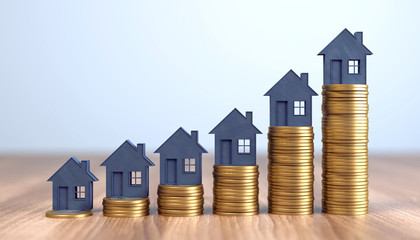

In [3]:
# MODIFICATION MÖGLICH
Datei_Pfad = "Immobilien_Daten_Bern_AWK"

# Die Daten werden hier eingelesen
Immobilien_data = pd.read_csv(Datei_Pfad)

# Wir füllen die nicht vorhandenen Daten mit NA (Not Available) strings für eine einfachere Bearbeitung
for col in ['PoolQual','VerschiedeneFeature','Gasse','ZaunQual','KaminQual','GarageZustand','GarageQual','GarageFassade']:
    Immobilien_data[col]=Immobilien_data[col].fillna('NA')
    
# Datum vorbereitung    
Immobilien_data['DatumVerkauft'] = pd.to_datetime(Immobilien_data[['JahrVerkauft', 'MonatVerkauft']].assign(DAY=1).rename(columns={'JahrVerkauft': 'YEAR', 'MonatVerkauft': 'MONTH'}))

Sollten sie mehr oder weniger als 10 Spalten oder 10 Zeilen sehen wollen, brauchen sie hier unten nur die Zahl 100 durch eine beliebige Anzahl ersetzen

In [4]:
# MODIFICATION MÖGLICH
Zeilen_Anzahl = 10
Spalten_Anzahl = 100

#CODE
with pd.option_context('display.min_rows', Zeilen_Anzahl, 'display.max_columns', Spalten_Anzahl):
    display(Immobilien_data)

,Id,WohnungsArt,Zonenklassifizierung,GrundstücksFront,Grundstücksfläche,Straße,Gasse,Grundstücksform,Grundstücksebenheit,Versorgungseinrichtungen,Grundstückskonfiguration,Landneigung,StatistischeBezirke,Bedingung1,Bedingung2,Haus_Typ,HausStil,HausQualität,HausZustand,Baujahr,UmbauDatum,DachTyp,DachMatl,Außenverkleidung1,Außenverkleidung2,FassadeVerkleidungTyp,FassadeFläche,AussenQual,AussenZustand,Fundament,KellerHöhe,KellerZustand,KellerBelichtung,KellerBewertung1,FertigeKellerFläche1,KellerBewertung2,FertigeKellerFläche2,UnfertigeKellerFläche,GesamtKellerFläche,Heizung,HeizungQualitätZustand,ZentraleKlimatisierung,ElektrischSystem,1StockFläche,2StockFläche,WohnFläche,Schlafzimmer,Küche,KücheQual,GesamtzahlRäume,Funktionalität,Kamine,KaminQual,GarageTyp,GarageBauJahr,GarageFassade,GarageAutos,GarageFläche,GarageQual,GarageZustand,AsphaltierteAuffahrt,OffeneVerandafläche,GeschlVerandafläche,PoolFläche,PoolQual,ZaunQual,VerschiedeneFeature,VerschiedeneFeatureWert,MonatVerkauft,JahrVerkauft,VerkaufTyp,Verkaufsbedingung,Preis,DatumVerkauft
0,1,60,RL,65.0,8450,Pflaster,NA,Reg,Flach,AlleÖffent,Innenparzelle,Sanft,Länggasse,Normal,Normal,1Fam,2Stockwerk,7,5,2003,2003,Giebel,Schindel,Vinylverkleidung,Vinylverkleidung,Ziegelfassade,196.0,Gut,Durchschnitt,Beton,Gut,Durchschnitt,No,GLQ,706,Unf,0,150,856,GasHeisseLuft,Ausgezeichnet,Y,SBrkr,856,854,1710,3,1,Gut,8,Typ,0,NA,Angebaut,2003.0,RFn,2,548,Durchschnitt,Durchschnitt,Y,61,0,0,NA,NA,NA,0,2,2008,WD,Normal,1459500,2008-02-01
1,2,20,RL,80.0,9600,Pflaster,NA,Reg,Flach,AlleÖffent,SR2,Sanft,Lorraine,Feedr,Normal,1Fam,1Stockwerk,6,8,1976,1976,Giebel,Schindel,Metallverkleidung,Metallverkleidung,Keine,0.0,Durchschnitt,Durchschnitt,CBlock,Gut,Durchschnitt,Gut,ALQ,978,Unf,0,284,1262,GasHeisseLuft,Ausgezeichnet,Y,SBrkr,1262,0,1262,3,1,Durchschnitt,6,Typ,1,Durchschnitt,Angebaut,1976.0,RFn,2,460,Durchschnitt,Durchschnitt,Y,0,0,0,NA,NA,NA,0,5,2007,WD,Normal,1270500,2007-05-01
2,3,60,RL,68.0,11250,Pflaster,NA,IR1,Flach,AlleÖffent,Innenparzelle,Sanft,Länggasse,Normal,Normal,1Fam,2Stockwerk,7,5,2001,2002,Giebel,Schindel,Vinylverkleidung,Vinylverkleidung,Ziegelfassade,162.0,Gut,Durchschnitt,Beton,Gut,Durchschnitt,Mn,GLQ,486,Unf,0,434,920,GasHeisseLuft,Ausgezeichnet,Y,SBrkr,920,866,1786,3,1,Gut,6,Typ,1,Durchschnitt,Angebaut,2001.0,RFn,2,608,Durchschnitt,Durchschnitt,Y,42,0,0,NA,NA,NA,0,9,2008,WD,Normal,1564500,2008-09-01
3,4,70,RL,60.0,9550,Pflaster,NA,IR1,Flach,AlleÖffent,Eckgrundstück,Sanft,Muesmatt,Normal,Normal,1Fam,2Stockwerk,7,5,1915,1970,Giebel,Schindel,Wd Sdng,Holzverschalung,Keine,0.0,Durchschnitt,Durchschnitt,Ziegel,Durchschnitt,Gut,No,ALQ,216,Unf,0,540,756,GasHeisseLuft,Gut,Y,SBrkr,961,756,1717,3,1,Gut,7,Typ,1,Gut,Seperat,1998.0,Unf,3,642,Durchschnitt,Durchschnitt,Y,35,272,0,NA,NA,NA,0,2,2006,WD,NichtNormal,980000,2006-02-01
4,5,60,RL,84.0,14260,Pflaster,NA,IR1,Flach,AlleÖffent,SR2,Sanft,Weissenbühl,Normal,Normal,1Fam,2Stockwerk,8,5,2000,2000,Giebel,Schindel,Vinylverkleidung,Vinylverkleidung,Ziegelfassade,350.0,Gut,Durchschnitt,Beton,Gut,Durchschnitt,Av,GLQ,655,Unf,0,490,1145,GasHeisseLuft,Ausgezeichnet,Y,SBrkr,1145,1053,2198,4,1,Gut,9,Typ,1,Durchschnitt,Angebaut,2000.0,RFn,3,836,Durchschnitt,Durchschnitt,Y,84,0,0,NA,NA,NA,0,12,2008,WD,Normal,1750000,2008-12-01
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1455,1456,60,RL,62.0,7917,Pflaster,NA,Reg,Flach,AlleÖffent,Innenparzelle,Sanft,Stadtbach,Normal,Normal,1Fam,2Stockwerk,6,5,1999,2000,Giebel,Schindel,Vinylverkleidung,Vinylverkleidung,Keine,0.0,Durchschnitt,Durchschnitt,Beton,Gut,Durchschnitt,No,Unf,0,Unf,0,953,953,GasHeisseLuft,Ausgezeichnet,Y,SBrkr,953,694,1647,3,1,Durchschnitt,7,Typ,1,Durchschnitt,Angebaut,1999.0,RFn,2,460,Durchschnitt,Durchschnitt,Y,40,0,0,NA,NA,NA,0,8,2007,WD,Normal,1225

In der obigen Tabelle sehen sie also die ihnen zur Verfügung stehenden Daten. Jeder Datenpunkt (1 Zeile) entspricht einem Immobilienverkauf der letzten Jahre. Jede Spalte entspricht einem spezifischen Typ von Information über den Verkauf. Sie können diese Tabelle etwas durchforsten und sehen, was es für Daten Kategorien (Spalten Namen) gibt und wie die einzelnen Datenpunkte aussehen. Falls sie mehr Informationen zu den Daten brauchen, können sie das Daten-Information Blatt benutzen, wo mehr Details zu finden sind.

Wollen sie mehr Informationen über eine bestimmte Spalte haben? Dann füllen sie nach Belieben die unteren Zellen aus. 

Diese werden ihnen für jede gewählte Spalte Informationen über die Anzahl (count), den Durchschnitt (mean), die Standardabweichung (std) und den minimum und maximum Wert geben. Im Falle von kategorischen Daten wird visualisiert, wie viele eindeutige Daten es gibt und was die Top Kategorien sind.


**Vorsicht**: Wir machen hier einen Unterschied zwischen numerischen und kategorischen Daten. 

In [5]:
# MODIFICATION MÖGLICH // NUR NUMERISCHE SPALTEN
# Wählen sie die Spalte aus
Numerische_Spalte_Name = "Baujahr"
Bild_Höhe = 300
Bild_Länge = 600

#CODE
print(Immobilien_data[Numerische_Spalte_Name].describe())

output_notebook()
Plib.numerical_hist_hover(Immobilien_data, Numerische_Spalte_Name, bins = Immobilien_data[Numerische_Spalte_Name].nunique(), plot_height = Bild_Höhe, plot_width = Bild_Länge)

count    1460.000000
mean     1971.267808
std        30.202904
min      1872.000000
25%      1954.000000
50%      1973.000000
75%      2000.000000
max      2010.000000
Name: Baujahr, dtype: float64


Loading BokehJS ...

In [6]:
# MODIFICATION MÖGLICH // NUR KATEGORISCHE SPALTEN
# Wählen sie die Spalte aus
Kategorische_Spalte_Name = "Grundstücksform"
Bild_Höhe = 300
Bild_Länge = 600

#CODE
print(Immobilien_data[Kategorische_Spalte_Name].describe())

output_notebook()
Plib.kategorical_hist_hover(Immobilien_data, Kategorische_Spalte_Name, plot_height = Bild_Höhe, plot_width = Bild_Länge)

count     1460
unique       4
top        Reg
freq       925
Name: Grundstücksform, dtype: object


Loading BokehJS ...

Sie können natürlich diese Daten mit komplexeren Grafiken visualisieren. Zum Beispiel im Falle von kategorischen Daten können sie die Daten mit verschachtelten proportionalen Rechtecken visualisieren. Aus Programmiergründen ist es leider aber nicht möglich in diesem Workshop die gleiche Interaktivität wie mit den anderen Grafiken zu gewährleisten.

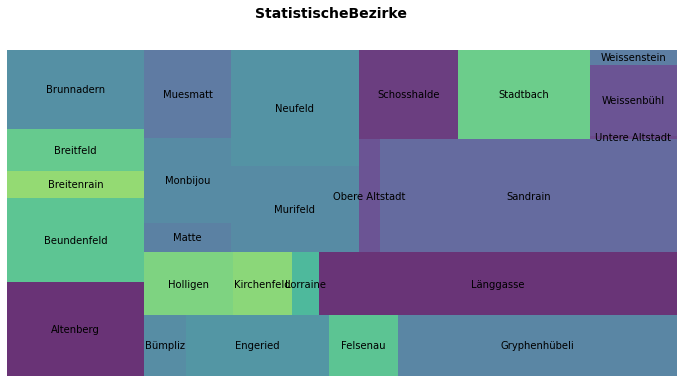

In [7]:
# MODIFICATION MÖGLICH
# Wählen sie die Spalte aus
Kategorische_Spalte_Name = "StatistischeBezirke"
# Wählen sie einen der folgenden keywords ("count","mean")
Statistik = "count"
Bild_Höhe = 6
Bild_Länge = 12


# CODE
df = Immobilien_data.groupby([Kategorische_Spalte_Name])
fig = plt.figure(figsize=(Bild_Länge,Bild_Höhe))
# overwriting name column

if Statistik == "count":
    squarify.plot(sizes=df['Preis'].count(), label=df['Preis'].count().index, alpha=.8)
elif Statistik == "mean":
    squarify.plot(sizes=df['Preis'].mean(), label=df['Preis'].mean().index, alpha=.8)
    
fig.suptitle(Kategorische_Spalte_Name,fontsize=14,fontweight="bold")
plt.axis('off')
plt.show()

Können sie sagen im welchem Statistischem Bezirke von NeuBern am meisten Datenpunkte gesammelt word sind ? Was ist das Durchschnittbaujahr der verkauften Immobilien ? Wieviele von den verkauften Immobilien haben Garagen?

## 2) Erste Daten Analyse

Nachdem sie sich einen ersten Überblick über die Daten verschafft haben, sollten sie also nun eine grobe Idee der Daten haben: Wie viele Daten gibt es? Welche Datenkategorien gibt es? Was sagen die Kategorien jeweils aus? 

Mit diesem Überblick sind sie nun in der Lage sich erste konkrete Fragen zu stellen, die sie versuchen können mit diesen Daten zu beantworten. Wenn sie im ersten Teil versucht haben, sich den Datensatz griffig zu machen, ist jetzt das Ziel, den Datensatz zu benutzen, um sich ein Überblick über die Situation zu geben (hier die Neu-Berner Immobilien Lage). 

Um dies zu erreichen suchen Datenwissenschaftler typischerweise nach Trends in den Daten. Sie analysieren mit Correlationmatrizen und Scatterplots, wie sich die Daten gegenseitig zu beeinflussen scheinen und welche Schlussfolgerung man daraus schliessen könnte. Um diesen Workshop nicht unnötig komplex zu machen, haben wir uns im folgenden Abschnitt auf eine zeitliche Analyse beschränkt.

Ein guter Beispiel für eine solche Frage ist: Wie hat sich der Durschnittpreis entwickelt über die Jahre der Datensammlung? Hat sich dieser nach unten oder nach oben entwickelt?

In [8]:
Bild_Höhe = 300
Bild_Länge = 600
    
output_notebook()
Plib.plot_line(Immobilien_data, "Preis", "mean", plot_height = Bild_Höhe, plot_width = Bild_Länge)

Loading BokehJS ...

Wann wurden am meisten Hause verkauft? Um welche Jahreszeit werden am meisten Häuser verkauft?

In [9]:
Bild_Höhe = 300
Bild_Länge = 600

output_notebook()

Plib.plot_line(Immobilien_data, "Id", "count", plot_height = Bild_Höhe, plot_width = Bild_Länge)

Loading BokehJS ...

Können sie sich andere Fragen vorstellen, dessen Trend sie über die Jahre und Monate sehen wollen? Die zwei unteren Zellen werden mit jeglicher Spalte mit numerischen Daten funktionieren und zeigen jeweils die Trends zusammengefasst über die Monate und zusammengefasst über die Jahre. Sie können auch auswählen, welche Art von Statistik sie visualisieren. Zur Auswahl stehen ihnen: 
* Anzahl (count), 
* Durchschnitt (mean)
* Standardabweichung (std)
* Minimum (min) 
* Maximum (max)

In [10]:
#Numerische Spalten (Sollen wir die hier schon haben?)
#'GrundstücksFront','Grundstücksfläche','FassadeFläche','UnfertigeKellerFläche','GesamtKellerFläche',
#'1StockFläche','2StockFläche','GarageFläche','WohnFläche','FertigeKellerFläche1','FertigeKellerFläche2'
#'OffeneVerandafläche','GeschlVerandafläche','PoolFläche'

# Hier werden die Trends über jeden einzelnen Monat betrachtet 

# MODIFICATION MÖGLICH
Bild_Höhe = 300
Bild_Länge = 600
# Wählen sie die Spalte aus
Numerische_Spalte_Name = "Id"
# Wählen sie einen der folgenden keywords ("Jahr","Monat")
Zeit_dauer = "Monat"
# Wählen sie einen der folgenden keywords ("count","mean","std","min","max")
Statistik = "count"

#CODE
output_notebook()
if Zeit_dauer == "Jahr":
    Plib.plot_line_year(Immobilien_data, Numerische_Spalte_Name, Statistik, plot_height = Bild_Höhe, plot_width = Bild_Länge)
elif Zeit_dauer == "Monat":
    Plib.plot_line(Immobilien_data, Numerische_Spalte_Name, Statistik, plot_height = Bild_Höhe, plot_width = Bild_Länge)

Loading BokehJS ...

### Kategorische Daten
Kategorischen Daten wie Haustyp, der Bezirk des Hauses oder die Form des Grundstückes über die Jahre zu betrachten kann auch interessante Auskünfte geben. Möglicherweise ist ein Typ von Haus oder Grundstück besonders beliebt geworden und hat also an Wert gewonnen? Welcher Stil von Haus ist am beliebtesten über die Jahre? Wie hat sich der Preis pro Bezirk oder pro einer anderen Kategorie entwickelt?

Diese Trends können sie mit den unteren Zellen erforschen. Wie bei den numerischen Spalten, können sie hier zwischen eine Jahres- oder einer Monats Zusammenfassung auswählen. Als Statistiken stehen ihnen die Anzahl von Verkäufe und der Durschnitt Preis zu Verfügung.


In [11]:
# MODIFICATION MÖGLICH
Bild_Höhe = 300
Bild_Länge = 600
# Wählen sie die Spalte aus
Kategorische_Spalte_Name = "StatistischeBezirke"

#CODE
output_notebook()
Plib.kategorical_hist_hover(Immobilien_data, Kategorische_Spalte_Name, plot_height = Bild_Höhe, plot_width = Bild_Länge)

Loading BokehJS ...

In [12]:
# MODIFICATION MÖGLICH
Bild_Höhe = 300
Bild_Länge = 600
# Wählen sie die Spalte aus
Kategorische_Spalte = 'Grundstücksform'
# Wählen sie einen der folgenden keywords ("Jahr","Monat")
Zeit_dauer = "Monat"
# Wählen sie einen der folgenden keywords ("count","mean")
Statistik = "mean"

output_notebook()
Plib.plot_line_kategorical(Immobilien_data, Kategorische_Spalte, aggr = Statistik, Zeit_dauer = Zeit_dauer, plot_height = Bild_Höhe, plot_width = Bild_Länge)

Loading BokehJS ...

Sie haben sich nun mit den Daten etwas vertraut gemacht. Haben sie schon ein paar Massnahmen die sie der Stadt Neu-Bern vorschlagen würden?

# Immobilien Betrug aufspüren

<img src = attachment:e719b5bf-6cf7-4f1b-8a78-82464a5b1801.png width="400" align="right">

In Neu-Bern ist von 2005 zu 2010 ein systematischer Immobilien Betrug von gleich mehreren Immobilienfirmen durchgeführt worden. Um Steuern hinterziehen zu können und ihre eigenen Gewinne als kleiner zu verkaufen, als sie es eigentlich waren, wurden mehrere Immobilien Verkaufspreise der Stadt falsch gemeldet. Entzürnte Kunden aber auch das Steueramt sind nun interessiert zu wissen, welche Verkäufe von diesem Betrug betroffen sind, um den Immobilienfirmen ein angemessenes Bussgeld aufzulegen und fehlende Steuern einzutreiben.

Der jetzige Datensatz wurde von Experten überprüft und ist nicht von diesem Betrug betroffen. Dieser Datensatz stellt aber nur ein Bruchteil der gesamten Immobilienverkäufe von Neu-Bern da. Die Stadtverwaltung möchte nun, dass dieser Datensatz als Basis für einen Algorithmus benutzt wird, dass anhand der vorhandenen Daten (alle im Datensatz sich befindenden Informationen mit Ausnahme vom Preis) die vermutlich dazugehörenden Verkaufspreise herausfindet. Mit diesen kann man dann über die restlichen Daten gehen und vermutliche Betrugsfälle aufspüren, wenn der Preis zu sehr von dem vorhergesagten Verkaufspreis abweicht.

Ihr Ziel ist es also hier, anhand des jetzigen Datensatzes, ein Entscheidungsbaum algorithmus (English: decisiontree) zu trainieren der Verkaufspreis Vorhersagen macht.

## Entscheidungsbaum  (Decisiontree)

Entscheidungsbäume in KI sind eine Idee des überwachten maschinellen Lernens, wo der Algorithmus aus einer Datenmenge heraus eine hierarchische Struktur von möglichst wenigen Entscheidungswegen bildet. Diese Regeln können dann als Baumdiagram visualisiert werden und ein klares Bild über die Entscheidungswege vermitteln. Dieses Verfahren ist weitverbreit und wird für Regressions und Klassifikations aufgaben benutzt wie zum Beispiel, um die Kreditwürdigkeit von Bankkunden zu klassifizieren. 

<img src="Images/Entscheidungsbaum_Beispiel.svg" width="400">
<em>Die obere Graphik zeigt ein einfaches Beispiel zur Vorhersage, 
ob ein Apfelbaum Früchte tragen wird.</em>

<br>
<br>
In diesen Fall werden wir ein Regression Entscheidungsbaum bauen, dass Immobilien Preise vorhersehen kann. Wir haben das Grundgerüst des Algorithmus schon für sie gebaut. Die Entscheidungen, die jetzt aber auf sie zufallen, sind:
<ul>
<li> Welche Daten Spalten benutzen sie ? </li>
<li> Wie gross soll der Entscheidungsbaum werden ? </li>
<li> Welchen Anteil der Daten soll zum Training benutzt werden ? </li>
</ul>
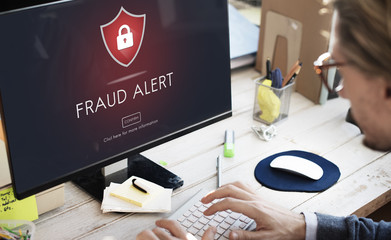

#### Welche Daten?
Welche Daten Spalten sie benutzen werden, beeinflusst was für Daten ihrem Entscheidungsbaum zur Verfügung stehen wird: Hier ist also wichtig zu überlegen, was für Daten nützlich sind um den Preis vorherzusehen. Sind diese nicht relevant oder sind diese mit zu vielen anderen Daten versteckt, kann dies möglicherweise die Leistung des Algorithmus verschlechtern.

#### Wie gross soll der Entscheidungsbaum werden?
Wie gross der Entscheidungsbaum wird, beeinflusst wie viele Fragen dieser stellen kann, bevor er eine Vorhersage trifft. Desto mehr Fragen, desto komplexer sind die Prozesse, die er modellieren kann und desto genauer sind seine Vorhersagen. Wenn er aber zu gross ist, ist es möglich, dass dieser sich in unnötige Details verliert und keine korrekten Vorhersagen mehr treffen kann. Dies nennt man "overfitting".

#### Aufteilung der Daten

Beim Trainieren eines KI-algorithmus werden im Machine Learning die zur Verfügung stehenden Daten immer aufgeteilt in Training und Testset (auch oft Validationsset genannt). Der Trainingset steht dem Algorithmus für das Lernen zur Verfügung während die Testdaten die Ergebnisse des Algorithmuses validieren. Dieser erlaubt es uns zu evaluieren, wie gut die Vorhersage des Algorithmus auf Daten, die dieser nie zuvor gesehen hat, ist. Ohne diesen Schritt können wir nicht einfach wissen wie gut der Algorithmus funktioniert. Typischerweise werden zwischen 10 zu 50 % der Daten für die Tests reserviert. Desto mehr Testdaten haben, desto sicherer sind sie, dass ihr Algorithmus auch im echten Anwendungsfall funktionieren wird.
<table>
    <tr>
        <th><center>High-Level Nutzung der Daten</center><br/><img src="https://miro.medium.com/max/656/0*FKrWuLRbB_MiEIKh" width=250 /></th>
        <th><p>&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;</p></th>
        <th><center>Aufteilung der Datensätze</center><br/><img src="https://res.cloudinary.com/dyd911kmh/image/upload/f_auto,q_auto:best/v1543836883/image_6_cfpjpr.png" width=350 /></th>
    </tr>
</table>

### Training

In [13]:
# MODIFICATION MÖGLICH
# ENTSCHEIDUNG: Sie können hier beliebig viele Kolumnen der Daten einlesen indem sie hier die Namen eigeben. 
# Sie dürfen nur nicht die Kolumne "Preis" benutzen, da diese das Ziel der Aufgabe ist:
# Beispiel Immobilien_features = ['WohnungsArt', 'Baujahr']
Immobilien_features = ['', '', '']

# ENTSCHEIDUNG: Hier können sie wählen welchen Anteil des Datensatzes sie zum Training und welchen sie zum validieren/ testen ihres Algorithmus benutzen. 
# Eine Zahl zwischen 0.1 zu 0.5 ist ungefähr üblich.
valid_size=0.1

Immobilien_features = ['WohnungsArt', 'Zonenklassifizierung', 'GrundstücksFront', 'Grundstücksfläche', 'Straße', 'Gasse', 'Grundstücksform',
       'Grundstücksebenheit', 'Versorgungseinrichtungen', 'Grundstückskonfiguration', 'Landneigung', 'StatistischeBezirke', 'Bedingung1',
       'Bedingung2', 'Haus_Typ', 'HausStil', 'HausQualität', 'HausZustand', 'Baujahr', 'UmbauDatum ', 'DachTyp', 'DachMatl', 'Außenverkleidung1',
       'Außenverkleidung2', 'FassadeVerkleidungTyp', 'FassadeFläche', 'AussenQual', 'AussenZustand', 'Fundament', 'KellerHöhe', 'KellerZustand',
       'KellerBelichtung', 'KellerBewertung1', 'FertigeKellerFläche1', 'KellerBewertung2', 'FertigeKellerFläche2', 'UnfertigeKellerFläche',
       'GesamtKellerFläche', 'Heizung', 'HeizungQualitätZustand', 'ZentraleKlimatisierung', 'ElektrischSystem', '1StockFläche', '2StockFläche',
       'WohnFläche', 'Schlafzimmer', 'Küche', 'KücheQual', 'GesamtzahlRäume', 'Funktionalität ', 'Kamine', 'KaminQual', 'GarageTyp', 'GarageBauJahr',
       'GarageFassade', 'GarageAutos', 'GarageFläche', 'GarageQual', 'GarageZustand', 'AsphaltierteAuffahrt', 'OffeneVerandafläche',
       'GeschlVerandafläche', 'PoolFläche', 'PoolQual', 'ZaunQual', 'VerschiedeneFeature', 'VerschiedeneFeatureWert', 'MonatVerkauft',
       'JahrVerkauft', 'VerkaufTyp', 'Verkaufsbedingung']

# CODE
# Die gewählten Daten werden hier eingelesen und vorbereitet
Immobilien_Daten = Immobilien_data[Immobilien_features]
Immobilien_Preis = Immobilien_data["Preis"]

# Die Kategorischen Kategorien werden hier vorbereitet
from sklearn import preprocessing
encoder = preprocessing.LabelEncoder()
Immobilien_Daten= Immobilien_Daten.apply(encoder.fit_transform)

# Die Daten werden hier in Training und Validations daten unterteilt 
X_train, X_val, y_train, y_val = train_test_split(Immobilien_Daten, Immobilien_Preis, test_size=valid_size, random_state=42)

In [14]:
# ENTSCHEIDUNG: Hier können sie entscheiden wie wieviele Fragen und Entscheidung ihr Baum sich stellen wird. Desto "grösser" der Baum, 
# desto mehr Fragen wird er stellen, aber wann haben wir zuviel Fragen?
Baum_Grösse = 5

# Initialisierung des Entscheidungsbaums
Immobilien_Preis_Predictor = DecisionTreeRegressor(max_depth=Baum_Grösse)

# Training
Immobilien_Preis_Predictor.fit(X_train, y_train)

DecisionTreeRegressor(max_depth=5)

### Bewertung

Jetzt haben sie einen trainierten Entscheidungsbaum. Um herauszufinden, wie gut dessen Vorhersagen sind, müssen wir sie also mit den echten Preisen vergleichen.
Hier unten sehen sie zum Beispiel die Vorhersagen und wirklichen Preise der ersten 5 Immobilien Verkäufe vom Testset.

In [15]:
print("Immobilien Preis Vorhersagen der ersten 5 Objekte: ", Immobilien_Preis_Predictor.predict(X_val.head()).astype(int))
print("Die echten Immobilien Preise der ersten 5 Objekte: ", y_val.head().values)

Immobilien Preis Vorhersagen der ersten 5 Objekte:  [1113394 2388432  976635 1277509 2570070]
Die echten Immobilien Preise der ersten 5 Objekte:  [1081500 2275000  805000 1113000 2208500]


Vielleicht ist euer erster Versuch nahe an den wahren Werten dran? Aber um wirklich einen guten Überblick über die Vorhersagenqualität zu bekommen, müssen wir diese über alle Validations und Tranings Daten testen. Die "explained_variance_score" und "median_absolute_error" metric sind zwei guten Kennzahlen dafür: Die explained_variance misst wieviel das Model die Variation (Streuung) des Datensatzes vorhersagen kann und der median_absolute_error gibt den Median des absoluten Fehler an. Die erste Kennzahl soll also so nahe wie möglich an der 1 sein und die Median des absoluten Fehler muss so klein wie möglich sein.

In [16]:
from sklearn.metrics import explained_variance_score
from sklearn.metrics import median_absolute_error

# Hier sehen wie gut es die Trainingsdaten vorhergesehen hat
Trainings_Preis_Vorhersagen = Immobilien_Preis_Predictor.predict(X_train)
print("Trainings Daten: Explained Variance: ", explained_variance_score(y_train, Trainings_Preis_Vorhersagen))
print("Trainings Daten: Median Absoluter Fehler: ",median_absolute_error(y_train, Trainings_Preis_Vorhersagen))

Trainings Daten: Explained Variance:  0.8574777517898957
Trainings Daten: Median Absoluter Fehler:  109234.6304195805


In [17]:
#Hier sehen wie gut es die Testdaten vorhergesehen hat
Preis_Vorhersagen = Immobilien_Preis_Predictor.predict(X_val)
print("Test Daten: Explained Variance: ", explained_variance_score(y_val, Preis_Vorhersagen))
print("Test Daten: Median Absoluter Fehler: ",median_absolute_error(y_val, Preis_Vorhersagen))

Test Daten: Explained Variance:  0.8370656339974354
Test Daten: Median Absoluter Fehler:  117290.09864864859


Haben sie ein gutes Training Ergebnis aber kein gutes Validationsergebnis, dann hat sich ihr Algorithmus an die Trainingsdaten überangepasst (overfitting) und sie müssen vielleicht ein weniger grossen Baum und weniger Features benutzen. Haben sie aber kein gutes Training Ergebnis, dann versteht ihr Algorithmus die Daten einfach noch nicht und sie können den Algorithmus komplexer machen, indem sie den Baum vergrössern und mehr Features benutzten (underfitting). 

"Underfitting" kann auch von ihrem Training/Testset Verhältnis beinflusst werden. Bei "underfitting" kann es sein, dass ihr Algorithmus einfach nicht genug Trainingsdaten hat, um das Model zu lernen und sie ihn mehr Daten zur Verfügung stellen müssen.

Vielleicht haben sie hier ein Model, das schon einigermassen funktioniert, aber was für Entscheidungen trifft dieses Model denn genau? Welche Kriterien sind besonders wichtig für den Entscheidungsprozess? Um das Verhalten eines Entscheidungsbaums besser zu verstehen, können sie dessen Entscheidungsprozess hier unten visualisieren. Dieser Visualisierungsprozess kann ihnen auch helfen Kriterien hinzuzufügen oder wegzulassen, um eine bessere Vorhersage zu bekommen.

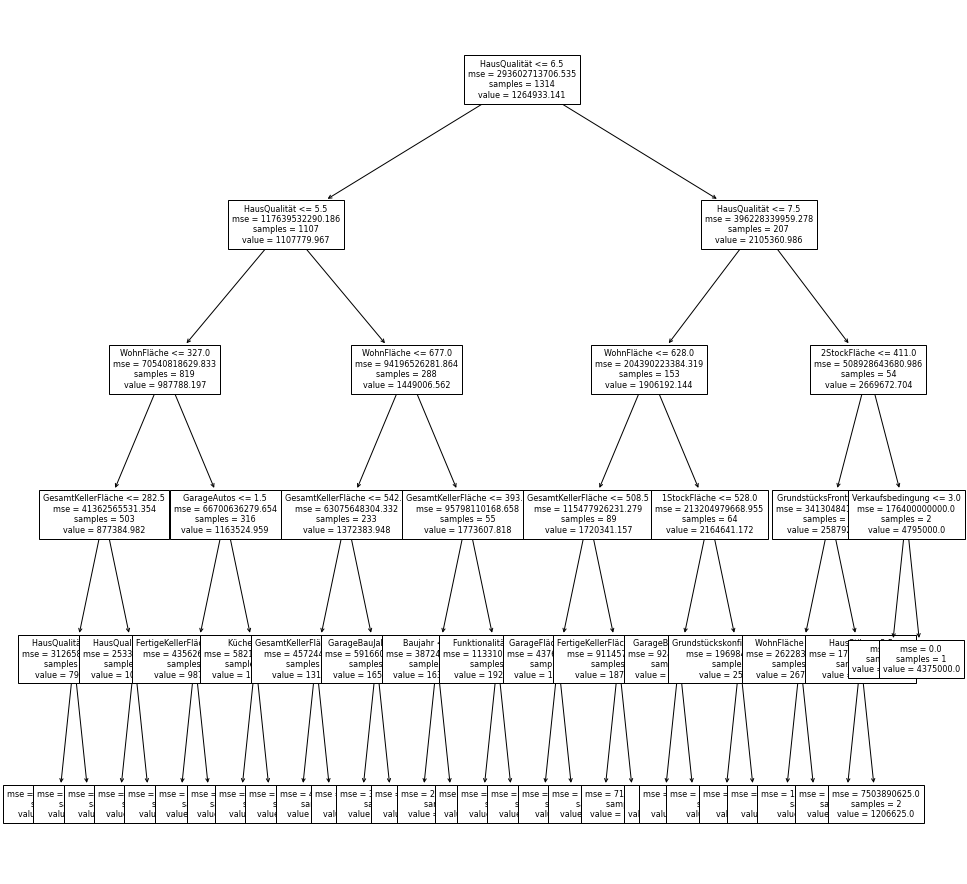

In [18]:
#Wenn das Bild zu klein oder zu gross ist, können sie mit Bild_grösse und Test_grösse die Bildgrösse anpassen
# MODIFICATION MÖGLICH
Bild_grösse = 16
Test_grösse = 8
# CODE
from sklearn import tree
plt.figure(figsize=(Bild_grösse,Bild_grösse))
tree.plot_tree(Immobilien_Preis_Predictor, fontsize=8,feature_names=Immobilien_features)
plt.show()

## Wettbewerb <img src=attachment:55fe6b07-2938-44bc-881e-aae6a9c8954c.png align = right>

Sie haben jetzt einen funkionierenden Algorithmus, welches in der Lage ist, Immobilien Preise vorherzusehen. Wie gut aber funktioniert dieser auf Daten, die euch nicht zur Verfügung stehen? Um die zu prüfen, haben die Moderatoren ein zusätzliches Testset von Immobiliendaten, um die Bewertung zwischen den verschiedenen Gruppen machen zu können. Die Gruppe, die das beste Ergebnis mit diesem Testset erzielt, kann einen Preis gewinnen. 

### Test Daten
In den unteren Zellen wird automatisch das letzte von euch trainierte Algorithmus benutzt. Wenn ihr diese durchspielen lässt, können wir euch wissen lassen wie gut euer Algorithmus funktioniert. Gefällt euch das Ergebnis, das ihr mit eurem jetzigen Algorithmus erreicht, nicht, könnt ihr einfach einen neuen trainieren, indem ihr von der Zelle "Training" wieder neu beginnt. **Achtung:** Merkt euch die Kombinationen, die gut funktioniert haben. Die alten Algorithmen werden bei einem neuen Training gelöscht. Jedes Resultat, das euch gefällt, könnt ihr dann den Moderatoren zeigen, die diese für euch im Leaderboard eintragen werden.
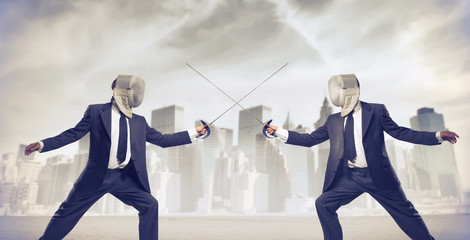

In [19]:
Datei_Pfad = "Immobilien_Daten_Bern_AWK_TEST"
# Die Test Daten werden hier eingelesen
Immobilien_Test_Set = pd.read_csv(Datei_Pfad)
Immobilien_Test_Daten = Immobilien_Test_Set[Immobilien_features]
Immobilien_Test_Daten= Immobilien_Test_Daten.apply(encoder.fit_transform)
Preis_Vorhersagen = Immobilien_Preis_Predictor.predict(Immobilien_Test_Daten.values)

#Dies benutzen wir nur im Falle eines Dashboard Wettbewerbs
#pd.DataFrame(Preis_Vorhersagen).to_csv('Preis_Vorhersagen', index=False)

In [20]:
print("Explained Variance: ", explained_variance_score(Immobilien_Test_Set['Preis'], Preis_Vorhersagen))
print("Median Absoluter Fehler: ", median_absolute_error(Immobilien_Test_Set['Preis'], Preis_Vorhersagen))

#versuchs_Nr += 1
#pd.DataFrame([explained_variance_score(Immobilien_Test_Set['Preis'], Preis_Vorhersagen)],columns = ["explained_variance_score"]).to_csv('Group_%s_Versuch%s.csv' %(str(group_id),str(versuchs_Nr)), index=False)

Explained Variance:  0.739524362457904
Median Absoluter Fehler:  177337.03749999998


**Viel Spass!! Und möge die beste Datascientist-Gruppe gewinnen!**


## Betrug aufspüren

Ihr Model erreicht nun gute Ergebnisse, aber sind diese gut genug, um mögliche Betrugsfällen aufzuspüren? Ein Betrugsfall wird dann als gefunden erklärt, wenn die Differenz zwischen dem Immobilien Preis und der Preis Vorhersage höher ist als den Median des totalen Fehler des Entscheidungsbaum. In den folgenden Zeilen haben wir ihnen einen kleinen Datensatz von 155 möglichen Betrugsfällen zur Verfügung gestellt. An dem können sie testen, wie gut ihr Model denn jetzt die möglichen Betrugsfälle aufspürt. 


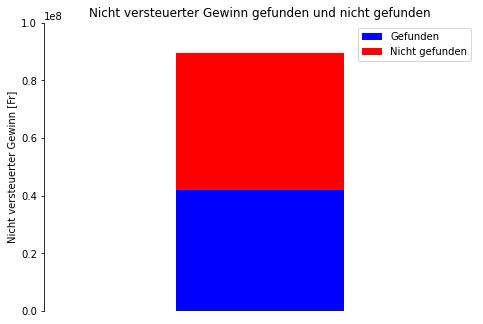

Von 155 möglichen Betrugsfällen haben sie 73 gefunden und 82 nicht gefunden. Die gefundenen Betrügsfällen, die sie aufgespürt haben,
kommen zusammengezählt auf 41931807 Franken an nicht versteuertem Immobilien Gewinn.


In [21]:


Datei_Pfad = "Immobilien_Daten_Bern_AWK_TEST_Betrug"
Median_Absoluter_Fehler = median_absolute_error(Immobilien_Test_Set['Preis'], Preis_Vorhersagen)

# Die Daten werden hier eingelesen
Immobilien_Betrugs_Set = pd.read_csv(Datei_Pfad)
# Die Daten werden nun analysiert
Immobilien_Betrugs_Daten = Immobilien_Betrugs_Set[Immobilien_features]
Immobilien_Betrugs_Daten = Immobilien_Betrugs_Daten.apply(encoder.fit_transform)
Preis_Vorhersagen_Betrug = Immobilien_Preis_Predictor.predict(Immobilien_Betrugs_Daten.values)

# Hier wird der Entscheid getroffen
Immobilien_Betrugs_Set['Betrug_GEFUNDEN'] = (np.abs(Immobilien_Betrugs_Set['Betrugs_Preis'] - Preis_Vorhersagen_Betrug) > Median_Absoluter_Fehler) 
[Möglicher_Betrugsfälle_Nein, Möglicher_Betrugsfälle_Ja] = Immobilien_Betrugs_Set['Betrug_GEFUNDEN'].value_counts().values

# Hier kalkulieren wir den nichtversteuerten Gewinn 
Nicht_versteuerter_Gewinn_gefunden = (Immobilien_Betrugs_Set.loc[Immobilien_Betrugs_Set['Betrug_GEFUNDEN'] == True]['Preis'] \
                                      - Immobilien_Betrugs_Set.loc[Immobilien_Betrugs_Set['Betrug_GEFUNDEN'] == True]['Betrugs_Preis']).sum()
Nicht_versteuerter_Gewinn_nicht_gefunden = (Immobilien_Betrugs_Set.loc[Immobilien_Betrugs_Set['Betrug_GEFUNDEN'] == False]['Preis'] \
                                            - Immobilien_Betrugs_Set.loc[Immobilien_Betrugs_Set['Betrug_GEFUNDEN'] == False]['Betrugs_Preis']).sum()

# Hier visualisieren die Antworten
Plib.bardiagram_anzeigen(Nicht_versteuerter_Gewinn_gefunden, Nicht_versteuerter_Gewinn_nicht_gefunden)
print("Von 155 möglichen Betrugsfällen haben sie %d gefunden und %d nicht gefunden." %(Möglicher_Betrugsfälle_Ja,Möglicher_Betrugsfälle_Nein),\
      "Die gefundenen Betrügsfällen, die sie aufgespürt haben,\nkommen zusammengezählt auf %d Franken an nicht versteuertem Immobilien Gewinn." %(Nicht_versteuerter_Gewinn_gefunden))

Glückwunsch! Somit haben sie der Stadt Neu-Bern einen guten Überblick geliefert über die Immobiliensituation geliefert und ein Algorithmus erstellt, welches Immobilienbetrug aufspürt. Dies sollte den Immobilienbetrug in der Zukunft verringern und gibt der Stadt Neu-Bern einen Anhaltspunkt über die Höhe der Busgelder, die zu verhängen sind. 

In [22]:
pip freeze > requirements.txt

Note: you may need to restart the kernel to use updated packages.
